<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
Model Prediction
</div>

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv('.\Data\processed_data_kansas.csv')

df

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\dungtb\AppData\Local\Temp\ipykernel_36192\2687787298.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv('.\Data\processed_data_kansas.csv')


,Report_No,Reported_Date,Reported_Time,From_Date,From_Time,Offense,IBRS,Description,Beat,Address,...,Zip Code,Rep_Dist,Area,DVFlag,Invl_No,Involvement,Race,Sex,Location 1,Firearm Used Flag
0,160007695,02/01/2016 12:00:00 AM,1:58,02/01/2016 12:00:00 AM,1:58,2100,90D,Driving Under Influe,142.0,E 39 ST/GARFIELD AV,...,64109.0,PJ3116,CPD,U,1,ARR,B,M,E 39 ST/GARFIELD AV\r\nKANSAS CITY 64109\r\n,N
1,160006559,01/27/2016 12:00:00 AM,13:04,01/25/2016 12:00:00 AM,17:55,630,23C,Stealing Shoplifting,421.0,7100 NW 86 TE,...,64153.0,PP0317,NPD,N,1,SUS,B,F,7100 NW 86 TE\r\nKANSAS CITY 64153\r\n,N
2,160023260,04/04/2016 12:00:00 AM,6:35,04/04/2016 12:00:00 AM,6:35,802,13B,Non Agg Assault Dome,141.0,E 39 ST/TROOST AV,...,64110.0,PJ3070,CPD,Y,1,VIC,B,M,E 39 ST/TROOST AV\r\nKANSAS CITY 64110\r\n,N
3,160015795,03/05/2016 12:00:00 AM,12:58,03/05/2016 12:00:00 AM,12:50,2655,90J,Trespassing,112.0,00 W 10 ST,...,64105.0,PJ0865,CPD,U,1,VIC,W,M,00 W 10 ST\r\nKANSAS CITY 64105\r\n,N
4,160039800,06/05/2016 12:00:00 AM,0:01,06/05/2016 12:00:00 AM,0:01,840,90Z,Resisting an Officer,223.0,E 63 ST/SWOPE PK,...,64120.0,PJ4922,MPD,U,1,VIC,U,U,E 63 ST/SWOPE PK\r\nKANSAS CITY 64120\r\n,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110492,160014371,02/29/2016 12:00:00 AM,2:51,02/28/2016 12:00:00 AM,18:34,799,NaN,Auto Theft Outside S,226.0,EAST 63 TRFY & LEWIS RD,...,64110.0,NaN,NaN,U,1,VIC,U,U,EAST 63 TRFY &amp; LEWIS RD\r\nKANSAS CITY 641...,N
110493,160046842,06/30/2016 12:00:00 AM,14:22,06/29/2016 12:00:00 AM,23:00,302,120,Armed Robbery,NaN,41ST & GILLHAM,...,NaN,NaN,NaN,U,1,SUS,B,M,41ST &amp; GILLHAM\r\nKANSAS CITY\r\n(39.05277...,Y
110494,160033682,05/13/2016 12:00:00 AM,7:03,05/13/2016 12:00:00 AM,6:50,1401,290,Property Damage,NaN,40 & 435 HWY,...,64132.0,NaN,NaN,U,1,SUS,U,U,40 &amp; 435 HWY\r\nKANSAS CITY 64132\r\n,N
110495,160006331,01/26/2016 12:00:00 AM,17:45,01/23/2016 12:00:00 AM,8:00,650,23G,Stealing Auto Parts/,NaN,1 H & BLOCK WAY,...,64105.0,NaN,NaN,U,1,SUS,U,U,1 H &amp; BLOCK WAY\r\nKANSAS CITY 64105\r\n(3...,N


C:\Users\dungtb\AppData\Local\Temp\ipykernel_36192\1901324064.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Reported_Date'] = pd.to_datetime(df['Reported_Date'])


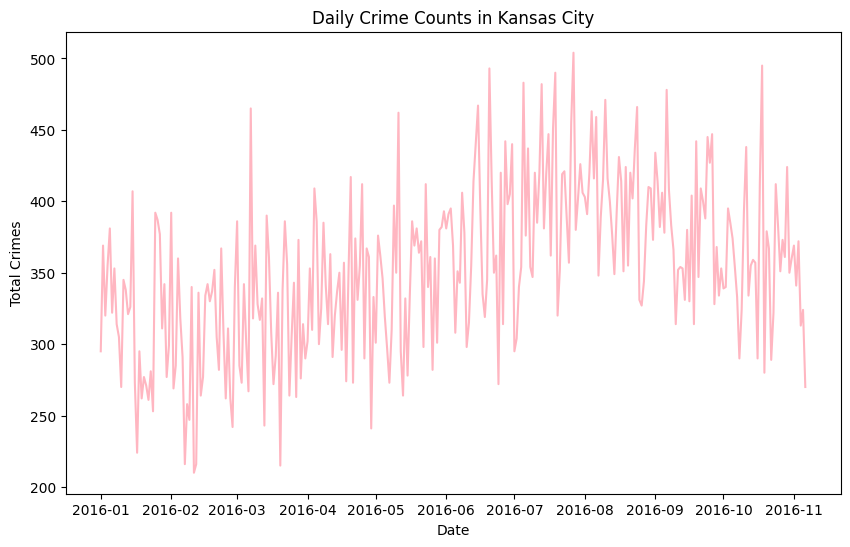

In [9]:
#Chuyển đổi cột 'Reported_Date' thành định dạng datetime
df['Reported_Date'] = pd.to_datetime(df['Reported_Date'])

# Lấy dataframe có City là Kansas City
kansas_city_df = df[df['City'] == 'KANSAS CITY']

# Nhóm dữ liệu theo ngày và thành phố, sau đó tính tổng số vụ phạm tội hàng ngày
daily_crime_counts = kansas_city_df.groupby(['Reported_Date', 'City']).size().reset_index(name='Total_Crimes')

df = daily_crime_counts.copy().drop(columns=['City'])

df.set_index('Reported_Date', inplace=True)

plt.figure(figsize=(10, 6))
plt.plot(df, color='lightpink')
plt.title('Daily Crime Counts in Kansas City')
plt.xlabel('Date')
plt.ylabel('Total Crimes')
plt.show()

# Mô hình SARIMA

In [10]:
!pip install pmdarima

from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

## Lựa chọn tham số ARIMA (p, d, q) và Yếu tố thời vụ

- Trong mô hình SARIMA (Seasonal Autoregressive Integrated Moving Average), có một số tham số quan trọng cần được xác định để xây dựng và ước lượng mô hình. Dưới đây là các tham số cơ bản và giải thích của chúng:
    + p (AR order): Đây là số lượng các lag trong phần tự hồi quy tự động (AR). Tham số này xác định số lượng giá trị quan sát trong quá khứ được sử dụng để dự báo giá trị hiện tại. Ví dụ, nếu p = 2, mô hình sẽ sử dụng hai giá trị quan sát gần nhất để dự báo giá trị hiện tại.
    
    + d (Integration order): Đây là mức độ sai phân tích hợp cần thực hiện trên chuỗi thời gian để làm cho nó ổn định và loại bỏ xu hướng. Tham số này đại diện cho số lần sai phân cần thực hiện trên chuỗi thời gian. Ví dụ, nếu d = 1, mô hình sẽ thực hiện một lần sai phân để loại bỏ xu hướng tuyến tính.
    
    + q (MA order): Đây là số lượng các lag trong phần trung bình trượt di động (MA). Tham số này xác định số lượng giá trị phần tử ngẫu nhiên trong quá khứ được sử dụng để dự báo giá trị hiện tại. Ví dụ, nếu q = 2, mô hình sẽ sử dụng hai giá trị phần tử ngẫu nhiên gần nhất để dự báo giá trị hiện tại.
    
    + P (Seasonal AR order): Đây là số lượng các lag trong phần tự hồi quy tự động mùa vụ. Tham số này tương tự như tham số p nhưng áp dụng cho yếu tố mùa vụ.
    
    + D (Seasonal integration order): Tương tự như tham số d, tham số D xác định mức độ sai phân tích hợp mùa vụ cần thực hiện.
    
    + Q (Seasonal MA order): Tương tự như tham số q, tham số Q xác định số lượng các lag trong phần trung bình trượt di động mùa vụ.
    
    + s (Seasonal period): Đây là chu kỳ của yếu tố mùa vụ, tức là số lượng quan sát trong một chu kỳ mùa vụ. Ví dụ, nếu dữ liệu được thu thập hàng tháng và có yếu tố mùa vụ hàng năm, thì chu kỳ mùa vụ sẽ là 12.

### Phân tích hàm tự tương quan (ACF)

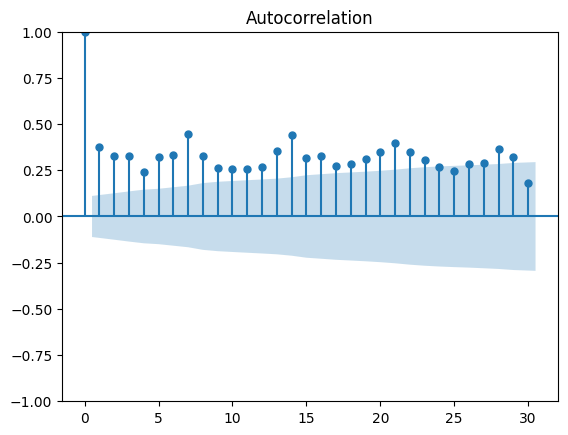

In [11]:
# Phân tích hàm tự tương quan
plot_acf(df, lags=30)
plt.show()

### Phân tích hàm tự tương quan riêng phần (PACF)

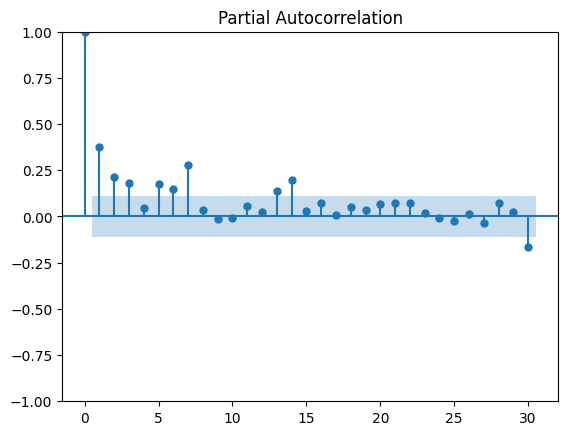

In [12]:
# Phân tích hàm tự tương quan riêng phần
plot_pacf(df, lags=30)
plt.show()

### Phân chia tập train/test

In [13]:
# Chia dữ liệu thành tập huấn luyện và tập kiểm tra
train_data = df.iloc[:len(df)-12]
test_data = df.iloc[len(df)-12:]
print('Train shape: ', train_data.shape)
print('Test shape: ', test_data.shape)

Train shape:  (299, 1)
Test shape:  (12, 1)


### Stepwise để tìm ra mô hình SARIMA tốt nhất

In [14]:
model_sarima = auto_arima(df, start_p=0, start_q=0,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(model_sarima.aic())

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=3558.100, Time=0.02 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=3407.401, Time=0.19 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.79 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=3499.958, Time=0.05 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=3358.076, Time=0.49 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.70 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.49 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=3435.408, Time=0.86 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=3326.194, Time=2.69 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=3377.598, Time=0.57 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=1.68 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.73 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=3323.203, Time=1.33 sec
 ARIMA(3,1,0)(1,1,0)[12]             : AIC=3375.9

- Từ kết quả ta có mô hình SARIMA(p=5, d=1, q=0)(p=2, D=1, q=0, m=12)

In [15]:
# Xác định các tham số cho mô hình SARIMA
order = (5, 1, 0)  # Tham số ARIMA (p, d, q)
seasonal_order = (2, 1, 0, 12)  # Tham số mùa vụ (P, D, Q, S)

# Xây dựng mô hình SARIMA
model = SARIMAX(df, order=order, seasonal_order=seasonal_order)

c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [16]:
# Khớp mô hình
result = model.fit()

# Đánh giá mô hình trên tập kiểm tra
predictions = result.predict(start=len(train_data), end=len(train_data)+len(test_data)-1, dynamic=False, typ='levels')

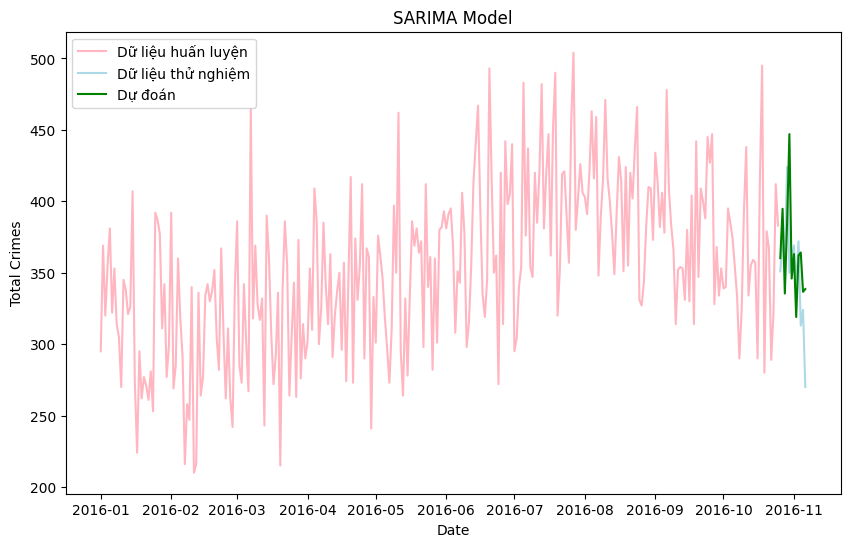

In [17]:
# Trực quan hóa kết quả
plt.figure(figsize=(10, 6))
plt.plot(train_data, label='Dữ liệu huấn luyện', color='lightpink')
plt.plot(test_data, label='Dữ liệu thử nghiệm', color='lightblue')
plt.plot(predictions, label='Dự đoán', color='green')
plt.title('SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Total Crimes')
plt.legend()
plt.show()